<a href="https://colab.research.google.com/github/karube044/100/blob/master/7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 準備
# ファイルの取得
# ファイルが大きすぎてwget URLでは無理だったため、調べて出てきた取得方法をほぼコピペしてます。
# (このファイル用に一部変更していますが)
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt

In [2]:
# 60. 単語ベクトルの読み込みと表示
# 単語ベクトル表現を扱うために、自然言語処理を扱うためのgensimというパッケージを用いる
# gensimのKeyedVectorsをインポートする
from gensim.models import KeyedVectors

# このファイルはword2vec形式のデータのようなのでKeyedVectorsのload_word2vec_formatで読み込む
# このデータはバイナリの形式のようなのでbinaryをTrueにする
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', binary=True)

# そうすると単語を指定するだけでその単語の単語ベクトル表現が抽出できる
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [3]:
# 61. 単語の類似度
# gensimのsimilarity()メソッドを用いるとコサイン類似度が簡単に求められる
model.similarity('United_States', 'U.S.')

0.73107743

In [4]:
# 61(確認)
# 実際に計算してみる
# numpyを用いる
import numpy as np
# コサイン類似度は二つのベクトルの（(内積)/(L2ノルムの積)）で求められる
def cos_sim(v1, v2):
  return np.dot(v1, v2) / (np.linalg.norm(v1, ord=2) * np.linalg.norm(v2, ord=2))

cos_sim(model['United_States'], model['U.S.'])

0.7310775

In [5]:
# 62. 類似度の高い単語10件
# most_similar()メソッドを用いるとtopn=Nで指定した上位N件のコサイン類似度の単語が得られる
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [6]:
# 63. 加法構成性によるアナロジー
# most_similarの内でpositiveに足すベクトル、negativeに引くベクトルを設定できる
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

In [7]:
# 64の準備
# URL先からファイルを取得する
!wget http://download.tensorflow.org/data/questions-words.txt

--2021-06-07 07:09:04--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.003s  

2021-06-07 07:09:04 (181 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [8]:
# 64. アナロジーデータでの実験

# 上で取得したファイルのデータは"Athens Greece Baghdad Iraq"のように、意味的アナロジーを評価するための組
# "amazing amazingly apparent apparently"のように文法的アナロジーを評価する組が含まれる
# これは14のカテゴリで分けられている(先頭に":"がつく行がカテゴリを表している)
# 64は"Athens Greece Baghdad Iraq"の1,2,3番目から4番目の単語を推測するというタスクである

# 上で取得したファイルを開き、別の書き込み用のファイルも作成する
# 目的の求めた単語と類似度をこのファイルに書き込む
with open('questions-words.txt', 'r') as f1, open('questions-words64.txt', 'w') as f2:
  # f1を1行ずつ読み込む
  for line in f1:
    # 1行は空白で区切られているので、split()で分割する
    line = line.split()
    if line[0] == ':':
      # その行の先頭が':'ならカテゴリとなるので、カテゴリ名を取得
      category = line[1]
    else:
      # それ以外の場合は、指示通りに単語の類似度を計算する。topn=1で最も類似度が高い単語のみを取得
      # タプルのリスト型で返されるので、単語とコサイン類似度を取得
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]

      # 取得したカテゴリを先頭、単語とコサイン類似度を末尾に付け加えてf2に書き込む
      # カテゴリを付け加えるのは、後に使用するため
      f2.write(' '.join([category] + line + [word, str(cos) + '\n']))

In [9]:
# 64　確認
!head -5 questions-words64.txt

capital-common-countries Athens Greece Baghdad Iraq Iraqi 0.6351870894432068
capital-common-countries Athens Greece Bangkok Thailand Thailand 0.7137669324874878
capital-common-countries Athens Greece Beijing China China 0.7235777974128723
capital-common-countries Athens Greece Berlin Germany Germany 0.6734622120857239
capital-common-countries Athens Greece Bern Switzerland Switzerland 0.4919748306274414


In [10]:
# 65. アナロジータスクでの正解率
# 正規表現を用いるのでインポートする
import re

# 正解率をもとめるための変数
# 意味的アナロジーの合計数
sem_cnt = 0
# 意味的アナロジーの正解数
sem_ok = 0
# 文法的アナロジーの合計数
syn_cnt = 0
# 文法的アナロジーの正解数
syn_ok = 0

# 先ほど作成したファイルを開く
with open('questions-words64.txt', 'r') as f:
  # 1行ずつ読み込み、同じく空白で分割する
  for line in f:
    line = line.split()
    
    # その行の先頭がgramでなければ(Noneが返される)意味的アナロジーとなる
    if not re.match(r'^gram.*', line[0]):
      # 合計数を1つ増やし
      sem_cnt += 1
      # 4つ目の単語(元のデータの4列目の単語)と5つ目の単語(64で求めた単語)が一致するか判断
      if line[4] == line[5]:
        # 一致していれば正解数を増やす
        sem_ok += 1
    
    # 先頭がgramなら文法的アナロジー
    else:
      # 意味的アナロジーと同様の操作を行う
      syn_cnt += 1
      if line[4] == line[5]:
        syn_ok += 1

# それぞれの正解率を表示する
print('意味的アナロジー正解率:', sem_ok/sem_cnt)
print('文法的アナロジー正解率:', syn_ok/syn_cnt)

意味的アナロジー正解率: 0.7308602999210734
文法的アナロジー正解率: 0.7400468384074942


In [11]:
# 66 準備
# URL先からファイルを取得し解凍する
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2021-06-07 09:17:09--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   119KB/s    in 0.2s    

2021-06-07 09:17:10 (119 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [12]:
# 66. WordSimilarity-353での評価

# リストの値で順位を取得するためのrankdataをインポートする
from scipy.stats import rankdata

# スピアマン相関係数を求める関数
def spearman_score(score1, score2):
  # スピアマン相関係数はデータの順位(のみ)を使用するのでrankdataにより順位番号に変える
  rank1 = rankdata(score1)
  rank2 = rankdata(score2)

  # データ数を求めておく
  N = len(score1)
  
  # 1-6*(二つのデータの順位の差の2乗の和)/((データ数)*(データ数の2乗-1)) で求められる
  return 1-( (6 * sum((rank1-rank2)**2) ) / (N*(N**2-1)) )

# 人間の類似度判定のスコアを格納するための関数
score_human = []
# 単語ベクトルの類似度スコアを格納するための関数
score_vec = []

# 'combined.csv'からデータを取得する
with open('combined.csv', 'r') as f:

  # 1行目は不要なので飛ばす
  next(f)
  for line in f:
    # それぞれの行は文末に'\n'がついているのでそれを取り除き
    # 単語は','で区切られているので、それで分割する
    line = line.replace('\n','').split(',')

    # 人間の類似度判定スコア(3列目の値)を格納する
    score_human.append(line[2])
    # 2つの単語ベクトルによる類似度をリストに追加する
    score_vec.append(model.similarity(line[0], line[1]))

# 上で作成した関数と二つのスコアのリストを用いてスピアマン相関係数を求める
print(spearman_score(score_human, score_vec))

0.684928013570671


In [13]:
# 67. k-meansクラスタリング
# 64で取得したquestions-words64.txtから国名を取得する
# 国名が存在するカテゴリは次の4つである
# 'capital-common-countries', 'capital-world','currency', 'gram6-nationality-adjective'

# sklearn.cluster.KMeansクラスをインポートする
from sklearn.cluster import KMeans

# 国名の重複を削除するためにset型にする
country = set()
# 国名の単語ベクトルを格納するリスト
country_vec = []

# 同じようにファイルを1行ずつ読み込み分割する
with open('questions-words64.txt') as f:
  for line in f:
    line = line.split()
    # 'capital-common-countries', 'capital-world'は2列目に国名がある
    if line[0] in ['capital-common-countries', 'capital-world']:
      country.add(line[2])

    # 'currency', 'gram6-nationality-adjective'は1列目に国名がある
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      country.add(line[1])

# set型は順序を持たないのでlist型に直す
country = list(country)

# 国名の単語ベクトルを取得する
for line in country:
  country_vec.append(model[line])

# k-meansクラスタリングを行う。クラスタ数はk=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(country_vec)

# 確認 クラスタごとに表示する
for i in range(5):
  # np.whereを用いてそのクラスタ番号のインデックスを取得する
  cluster = list(np.where(kmeans.labels_ == i))[0]
  print('cluster', i)
  # 国名のリストからインデックス番号の国名を表示する。国名間は','で結合
  print(', '.join([country[k] for k in cluster]))

cluster 0
Turkey, Lebanon, Iraq, Jordan, Iran, Egypt, Syria, Libya, Afghanistan, Israel
cluster 1
Mexico, Oman, Morocco, Dominica, Guyana, Nicaragua, Bahamas, Qatar, Indonesia, Nepal, Bhutan, Philippines, Honduras, Malaysia, Suriname, Laos, Thailand, Chile, Bangladesh, India, Ecuador, Cuba, Samoa, Peru, Colombia, China, Pakistan, Venezuela, Fiji, Tuvalu, Belize, Jamaica, Vietnam, Bahrain, Taiwan, Cambodia
cluster 2
Italy, Denmark, USA, Canada, Norway, Argentina, Sweden, Uruguay, Austria, Brazil, Iceland, England, Belgium, Greenland, Finland, Liechtenstein, Spain, Portugal, Switzerland, France, Ireland, Europe, Netherlands, Japan, Germany, Australia, Korea
cluster 3
Kenya, Ghana, Tunisia, Sudan, Nigeria, Niger, Gabon, Zimbabwe, Mozambique, Somalia, Uganda, Botswana, Rwanda, Senegal, Gambia, Mauritania, Zambia, Burundi, Namibia, Liberia, Malawi, Guinea, Angola, Mali, Madagascar, Eritrea, Algeria
cluster 4
Malta, Bulgaria, Kazakhstan, Croatia, Uzbekistan, Hungary, Cyprus, Albania, Poland,

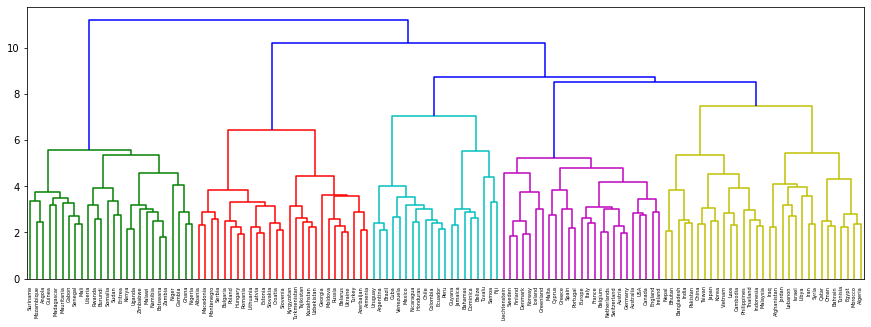

In [14]:
# 68. Ward法によるクラスタリング
# scipy.cluster.hierarchyのlinkageでward法によるクラスタリングを行う
# またdendrogramもインポートして、表示できるようにする
from scipy.cluster.hierarchy import dendrogram, linkage
# matplotlibを用いてデンドログラムとして可視化する
from matplotlib import pyplot as plt

# グラフのサイズを設定
plt.figure(figsize=(15, 5))
# ward法によるクラスタリング(67で作成した国名の単語ベクトルを用いる)
Z = linkage(country_vec, method='ward')
# デンドログラムの作成(ラベルは国名)
dendrogram(Z, labels=country)
plt.show()

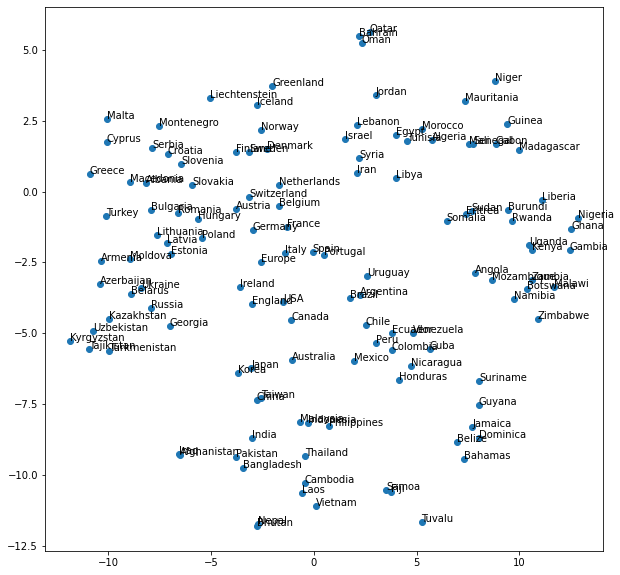

In [15]:
# 69. t-SNEによる可視化
from sklearn.manifold import TSNE
 
#  t-SNEによりcountry_vecを2次元ベクトルに埋め込む
tsne = TSNE().fit_transform(country_vec)
plt.figure(figsize=(10, 10))

# plt.scatterで散布図として表示する
# numpy.arrayでベクトル表現として扱い、転置をしてx軸、y軸のベクトルを取得する
plt.scatter(np.array(tsne).T[0], np.array(tsne).T[1])

# plt.annotateでそれぞれのポイントに注釈(国名)を付ける
# tsneからそれぞれの座標、countryから国名を取得する
for (x, y), name in zip(tsne, country):
    plt.annotate(name, (x, y))

# 図の表示
plt.show()